# Kyle Model Example

This notebook demonstrates the Kyle (1985) model of insider trading with an informed trader, market maker, and noise traders.

## Section 1: Import Required Libraries

In [ ]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Add the src directory to the path to import our models
src_path = Path('.').resolve() / 'src' if (Path('.').resolve() / 'src').exists() else Path('.').resolve().parent / 'src'
sys.path.insert(0, str(src_path))

from lob_modeling.models.kyle import KyleModel

## Section 2: Kyle Model Overview

The Kyle model captures the interaction between:
- **Informed trader**: Has private information about the true security value
- **Market maker**: Sets prices based on the order flow (informed + noise orders)
- **Noise traders**: Submit random orders, providing liquidity

Key parameters:
- `V_0`: Initial security value
- `V_N`: True security value at end of period
- `SIGMA_G`: Uncertainty about the true value
- `SIGMA`: Noise trader order flow volatility
- `N`: Number of time periods

## Section 3: Initialize the Model

In [ ]:
# Initialize the Kyle model with default parameters
model = KyleModel(
    V_0=5.0,           # Initial security value
    V_N=5.0,           # We'll update this randomly
    SIGMA_G=0.4,       # Initial uncertainty about true value
    SIGMA_T=0.2,       # Target true variance
    SIGMA=2.0,         # Noise trader order flow volatility
    ERR=0.05,          # Convergence error tolerance
    N=50,              # Number of time periods
    MAX_ITER=100       # Max iterations for convergence
)

print("Kyle Model initialized with the following parameters:")
print(f"  Initial security value (V_0): {model.V_0}")
print(f"  True security value (V_N): {model.V_N[0]:.4f}")
print(f"  Initial uncertainty (SIGMA_G): {model.SIGMA_G}")
print(f"  Target variance (SIGMA_T): {model.SIGMA_T}")
print(f"  Noise trader volatility (SIGMA): {model.SIGMA}")
print(f"  Number of periods (N): {model.N}")

Kyle Model initialized with the following parameters:
  Initial security value (V_0): 5.0
  True security value (V_N): 5.7873
  Initial uncertainty (SIGMA_G): 0.4
  Target variance (SIGMA_T): 0.2
  Noise trader volatility (SIGMA): 2.0
  Number of periods (N): 50


## Section 4: One-Period Model

In the single-period version, the informed trader observes the true value and submits an optimal order. The market maker observes total order flow and sets the price.

In [ ]:
# Run the one-period Kyle model
print("="*60)
print("ONE-PERIOD KYLE MODEL")
print("="*60)
one_period_results = model.one_period_price()
print(f"\nMM Price: ${one_period_results['MM Price']:.4f}")
print(f"Informed Trader Expected Profit: ${one_period_results['Informed Profit']:.4f}")

ONE-PERIOD KYLE MODEL
Market Maker Price: 10.256455335177197
Informed Trader Expected Profit: 0.9799503456663703

MM Price: $10.2565
Informed Trader Expected Profit: $0.9800


## Section 5: Multi-Period Model

In the multi-period version, the model iteratively solves for optimal pricing schedules and order sizes across multiple trading rounds. The algorithm converges on the volatility of the informed trader's information.


MULTI-PERIOD KYLE MODEL

Target true volatility (SIGMA_T): 0.2
Initial guess for SIGMA[0]: 2.0

Solving multi-period equilibrium...
2.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.15811388 0.        ]
0.02
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.8 0.4]
2.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         

/home/iancwm/git/LOB-Modeling/src/lob_modeling/models/kyle.py:100: ComplexWarning: Casting complex values to real discards the imaginary part
  LAMBDA[n - 1] = np.median(lambda_roots)


2.0
[1.69213524e+04 1.41727399e+04 1.18705970e+04 9.94240177e+03
 8.32741205e+03 6.97475248e+03 5.84181158e+03 4.89289944e+03
 4.09812342e+03 3.43244649e+03 2.87489850e+03 2.40791557e+03
 2.01678680e+03 1.68919085e+03 1.41480779e+03 1.18499401e+03
 9.92509906e+02 8.31291864e+02 6.96261162e+02 5.83164107e+02
 4.88437850e+02 4.09098419e+02 3.42646326e+02 2.86988397e+02
 2.40371003e+02 2.01326030e+02 2.07126096e+02 1.73481179e+02
 1.45300353e+02 1.21698111e+02 1.01927662e+02 8.53709685e+01
 7.14995044e+01 5.98864342e+01 5.01511347e+01 4.20084838e+01
 3.51705384e+01 2.94677169e+01 2.46535473e+01 2.06737983e+01
 1.72610156e+01 1.45148587e+01 1.20465440e+01 1.02190840e+01
 8.33100116e+00 7.26191071e+00 5.60045623e+00 5.30758263e+00
 3.62963932e-01 1.58113883e-01 0.00000000e+00]
0.02
[-0.08089208 -0.08089208 -0.08089208 -0.08089208 -0.08089208 -0.08089208
 -0.08089208 -0.08089208 -0.08089208 -0.08089208 -0.08089208 -0.08089208
 -0.08089208 -0.08089209 -0.08089209 -0.0808921  -0.0808921  -0.08

/home/iancwm/git/LOB-Modeling/src/lob_modeling/models/kyle.py:97: ComplexWarning: Casting complex values to real discards the imaginary part
  LAMBDA[n - 1] = max(lambda_roots)
/home/iancwm/git/LOB-Modeling/src/lob_modeling/models/kyle.py:85: RuntimeWarning: divide by zero encountered in scalar divide
  BETA[n - 1] = 1 / (4 * LAMBDA[n] * (1 - (BETA[n] * LAMBDA[n])))
/home/iancwm/git/LOB-Modeling/src/lob_modeling/models/kyle.py:102: RuntimeWarning: divide by zero encountered in scalar divide
  DELTA[n - 1] = 1 / (4 * LAMBDA[n] * (1 - (BETA[n] * LAMBDA[n])))
/home/iancwm/git/LOB-Modeling/venv/lib/python3.12/site-packages/numpy/lib/_polynomial_impl.py:253: RuntimeWarning: invalid value encountered in divide
  A[0, :] = -p[1:] / p[0]


LinAlgError: Array must not contain infs or NaNs

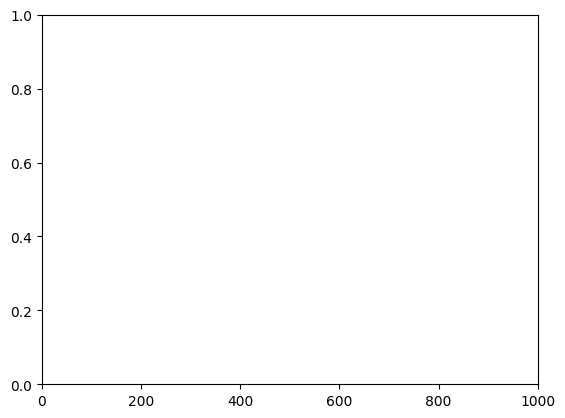

In [ ]:
# Initialize a fresh model for multi-period analysis
model_mp = KyleModel(
    V_0=5.0,
    V_N=5.0,
    SIGMA_G=0.4,
    SIGMA_T=0.2,
    SIGMA=2.0,
    ERR=0.05,
    N=50,
    MAX_ITER=100
)

print("\n" + "="*60)
print("MULTI-PERIOD KYLE MODEL")
print("="*60)
print(f"\nTarget true volatility (SIGMA_T): {model_mp.SIGMA_T}")
print(f"Initial guess for SIGMA[0]: {model_mp.SIGMA}")
print("\nSolving multi-period equilibrium...")

# Run the multi-period model without plotting during convergence
model_mp.multiperiod_price(plot=True)

## Section 6: Model Interpretation

The Kyle model reveals several important insights about market microstructure:

1. **Information Advantage**: The informed trader's profit increases with the information advantage (difference between V_N and V_0)

2. **Order Flow as Signal**: The market maker learns from order flow. Higher order flow reveals more information.

3. **Volatility Trading-off**: There's a trade-off between:
   - Larger informed order sizes (more profitable for insider)
   - Larger spreads (market maker compensates for adverse selection risk)

4. **Time Decay**: In multi-period models, the informed trader gradually reveals information through dynamic trading.

## Section 7: Practical Applications

The Kyle model can be extended to study:

- **Market Efficiency**: How quickly does private information get incorporated into prices?
- **Bid-Ask Spreads**: How do spreads vary with information asymmetry?
- **Trading Volume**: Why do informed traders sometimes submit large orders despite revealing their private information?
- **Regulation**: How do position limits or disclosure requirements affect information revelation?

The model provides a foundation for understanding how informed traders strategically submit orders to maximize profit while managing information leakage.